# Рыбка Артем

# Оглавление:
* [Задание 1](#01-bullet)
* [Задание 2](#02-bullet)
* [Задание 3](#03-bullet)
* [Задание 4](#04-bullet)
* [Задание 5](#05-bullet)

In [1]:
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error
from scipy.stats import anderson

import os

## Задание 1 <a class="anchor" id="01-bullet"></a>

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

#### Ответ.
Мне кажется, что все вышеперечисленные наборы можно отнести к временным рядам. Если в данном случаее количество отказов компьютера и число обращений в поликлиннику -это статистические данные, а не просто одно число за все время.

## Задание 2 <a class="anchor" id="02-bullet"></a>

Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [6]:
data['DUQ_MW'].isnull().sum()

0

### -------------------------------------------------
Предварительная оценка показывает, что:
1. В датесете нет пропущенных данных.
2. Индексы находятся в диапазоне от 31.12.2005 до 02.01.2018.
3. Шаг измерений - 1 час.
4. Всего измерений - 119068.
5. Тип данных - float64.

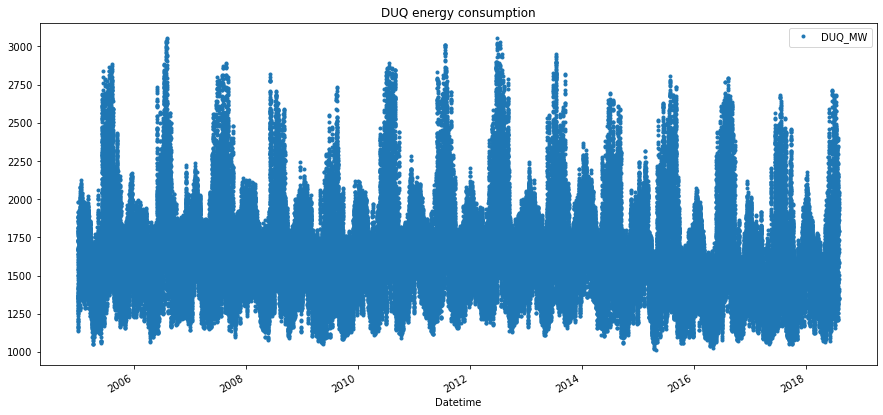

In [7]:
data.plot(style='.', figsize = (15,7), title = 'DUQ energy consumption')

По графику видно, что данный ряд имеет циклическую структуру.
Особых выбросов не заметно.

In [8]:
# !pip install pandas_profiling --user


In [9]:
import pandas_profiling

In [10]:
pandas_profiling.ProfileReport(data)

F:\ANACONDA\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### -------------------------------------------------
Окончательный вывод:
1. В датесете нет пропущенных данных.
2. Индексы находятся в диапазоне от 31.12.2005 до 02.01.2018.
3. Шаг измерений - 1 час.
4. Всего измерений - 119068.
5. Тип данных - float64.
6. По графическому анализу: Датасет имеет циклическую структуру, выбросов не замеченно. 
7. Распределение по графику похоже на нормальное

## Задание 3 <a class="anchor" id="03-bullet"></a>

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [11]:
brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [12]:
brent.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [13]:
if brent['Значение'].isnull().sum() > 0:
    print('Есть пропуски')
else:
    print('Все ок. Пропусков нет. Можно работать')

Все ок. Пропусков нет. Можно работать


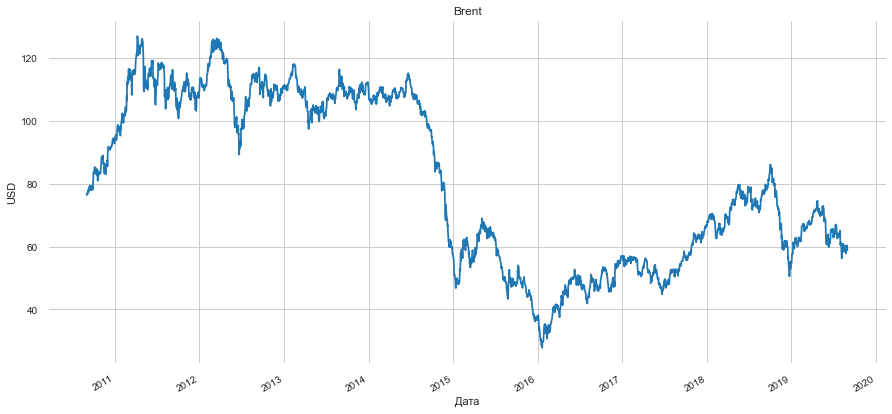

In [14]:
brent['Значение'].plot(figsize=(15,7), title = 'Brent')
plt.ylabel('USD')
plt.grid()

In [39]:
monthly_data = brent['Значение'].resample('M').mean().to_frame()
week_data = brent['Значение'].resample('W').mean().to_frame()
monthly_std = brent['Значение'].resample('M').std().to_frame()
week_std = brent['Значение'].resample('W').std().to_frame()
year_data = brent['Значение'].resample('Y').mean().to_frame()
year_std = brent['Значение'].resample('Y').std().to_frame()

In [26]:
monthly_data.describe()

,Значение
count,109.000000
mean,80.571077
std,26.667645
min,31.984737
25%,57.264074
50%,75.704800
75%,108.559167
max,124.502308


In [27]:
week_data.describe()

,Значение
count,469.000000
mean,80.712938
std,26.661299
min,28.690000
25%,56.206000
50%,76.601667
75%,108.114000
max,125.006667


In [28]:
monthly_data



,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200
...,...
2019-05-31,69.966667
2019-06-30,62.980400
2019-07-31,64.292963


## Задание 4 <a class="anchor" id="04-bullet"></a>

Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Text(0.5, 1.0, 'Недельный график')

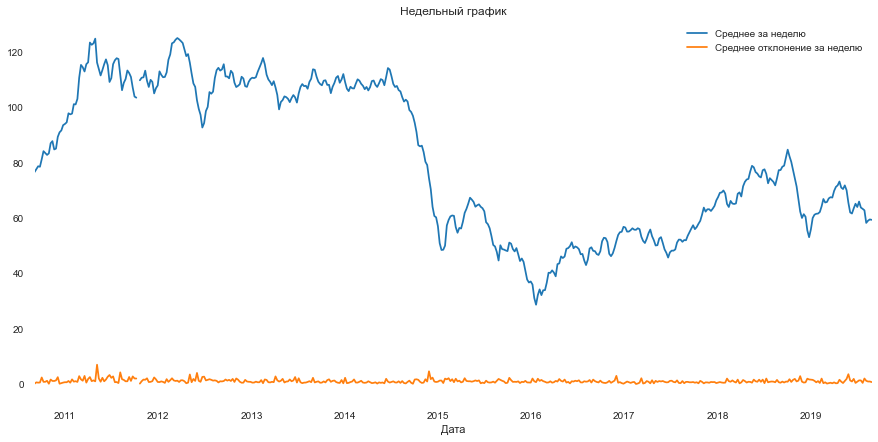

In [73]:
week_data['Значение'].plot(figsize=(15,7), label = 'Среднее за неделю')

week_std['Значение'].plot(figsize=(15,7), label = 'Среднее отклонение за неделю')
#monthly_data['Значение'].plot(figsize=(15,7), title = 'Month')
plt.legend()
plt.title('Недельный график')


Text(0.5, 1.0, 'Месячный график')

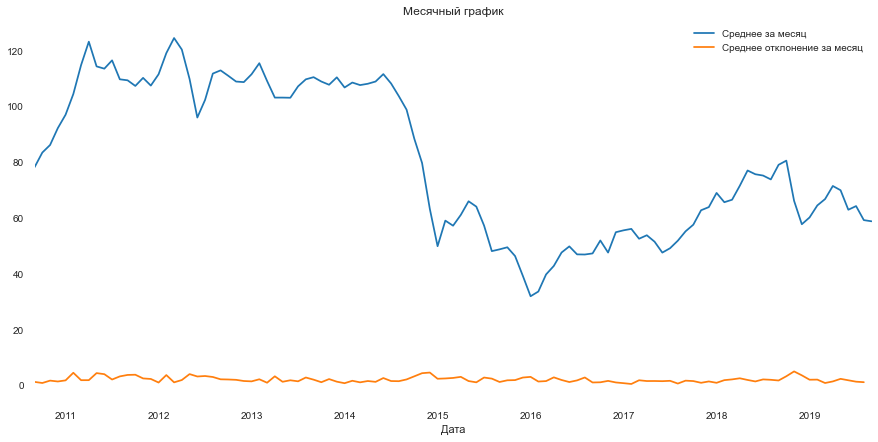

In [74]:
monthly_data['Значение'].plot(figsize=(15,7), label = 'Среднее за месяц')

monthly_std['Значение'].plot(figsize=(15,7), label = 'Среднее отклонение за месяц')
plt.legend()
plt.title('Месячный график')

Text(0.5, 1.0, 'Годовой график')

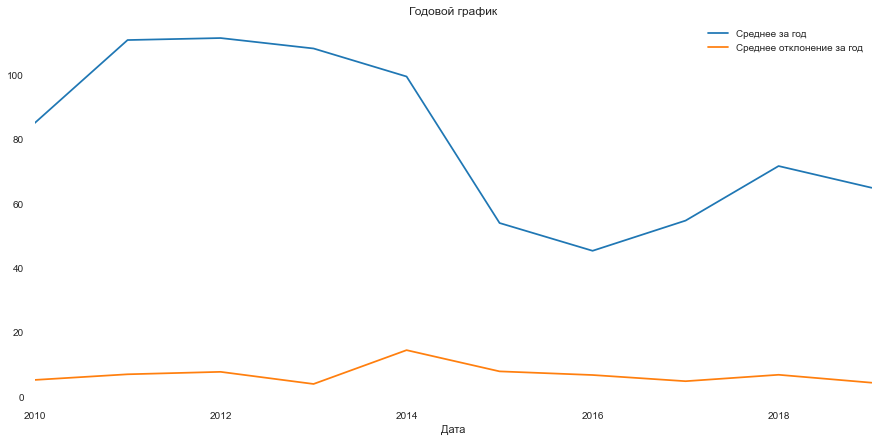

In [75]:
year_data['Значение'].plot(figsize=(15,7), label = 'Среднее за год')

year_std['Значение'].plot(figsize=(15,7), label = 'Среднее отклонение за год')
plt.legend()
plt.title('Годовой график')

## Задание 5 <a class="anchor" id="05-bullet"></a>


Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

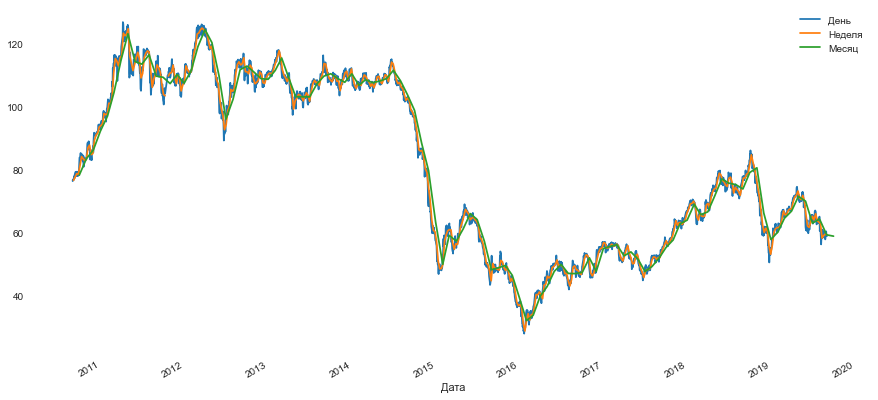

In [68]:
brent['Значение'].plot(figsize=(15,7), label = "День")
week_data['Значение'].plot(figsize=(15,7), label = "Неделя")
monthly_data['Значение'].plot(figsize=(15,7), label = "Месяц")
plt.legend()

(40.0, 90.0)

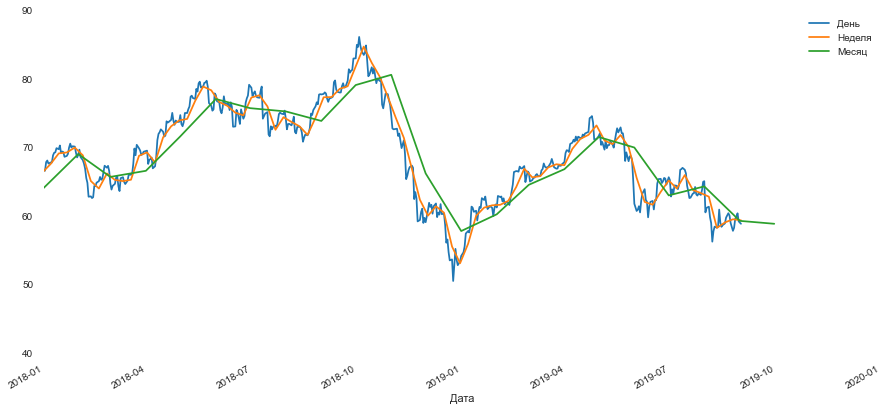

In [69]:
brent['Значение'].plot(figsize=(15,7), label = "День")
week_data['Значение'].plot(figsize=(15,7), label = "Неделя")
monthly_data['Значение'].plot(figsize=(15,7), label = "Месяц")

plt.legend()
plt.xlim('2018-01-01','2020-01-01')
plt.ylim(40,90)

#### Поведение графиков недельных и месячных изменилось в сторону округления. Шум уменьшился. Но и пропадают минимумы и максимумы.
